#  Problem Statement : Next Word Prediction

## Statistical language model


![](LanguageModel.PNG)

In [1]:
##CHALLENGES

#Sensitivity to the training corpus
#Smoothing

In [2]:
#This assumption that the probability of a word depends only on the previous word is also known as Markov assumption.

# Import Required Libraries:

In [1]:
import pandas as pd
import numpy as np

import pickle
import numpy as np
import os


In [2]:


import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Embedding, LSTM, Dense



#john started a textile factory

# transformer models -- attention model

#BERT
#GPT-1/2/3 -- OPEN AI





In [48]:
"""
http://www.gutenberg.org/cache/epub/5200/pg5200.txt

"""


file = open("metamorphosis.txt", "r", encoding = "utf8")

lines = []

for i in file:
    lines.append(i)
    
    

In [49]:

print("First Line: ", lines[0])

print("Last Line: ", lines[-1])



First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

Last Line:  first to get up and stretch out her young body.


lines=['\ufeffOne morning, when Gregor Samsa woke from troubled dreams, he found\n',
 'himself transformed in his bed into a horrible vermin.  He lay on\n',
 'his armour-like back, and if he lifted his head a little he could\n',
 'see his brown belly, slightly domed and divided by arches into stiff\n',
 'sections.  The bedding was hardly able to cover it and seemed ready\n',
 'to slide off any moment.  His many legs, pitifully thin compared\n',
 'with the size of the rest of him, waved about helplessly as he\n',
 'looked.\n',
 '\n',
 '"What\'s happened to me?" he thought.  It wasn\'t a dream.  His room,\n',
 'a proper human room although a little too small, lay peacefully\n',
 'between its four familiar walls.  A collection of textile samples\n',
 'lay spread out on the table - Samsa was a travelling salesman - and\n',
 'above it there hung a picture that he had recently cut out of an\n',
 'illustrated magazine and housed in a nice, gilded frame.  It showed\n',
 'a lady fitted out with a fur hat and fur boa who sat upright,\n',
 'raising a heavy fur muff that covered the whole of her lower arm\n']


In [6]:
lines



['\ufeffOne morning, when Gregor Samsa woke from troubled dreams, he found\n',
 'himself transformed in his bed into a horrible vermin.  He lay on\n',
 'his armour-like back, and if he lifted his head a little he could\n',
 'see his brown belly, slightly domed and divided by arches into stiff\n',
 'sections.  The bedding was hardly able to cover it and seemed ready\n',
 'to slide off any moment.  His many legs, pitifully thin compared\n',
 'with the size of the rest of him, waved about helplessly as he\n',
 'looked.\n',
 '\n',
 '"What\'s happened to me?" he thought.  It wasn\'t a dream.  His room,\n',
 'a proper human room although a little too small, lay peacefully\n',
 'between its four familiar walls.  A collection of textile samples\n',
 'lay spread out on the table - Samsa was a travelling salesman - and\n',
 'above it there hung a picture that he had recently cut out of an\n',
 'illustrated magazine and housed in a nice, gilded frame.  It showed\n',
 'a lady fitted out with a fur

# Clean the data:

In [50]:
data = ""

for i in lines:
    data = ' '. join(lines)


'\ufeffOne morning, when Gregor Samsa woke from troubled dreams, he found\n himself transformed in his bed into a horrible vermin.  He lay on\n his armour-like back, and if he lifted his head a little he could\n see his brown belly, slightly domed and divided by arches into stiff\n sections.  The bedding was hardly able to cover it and seemed ready\n to slide off any moment.  His many legs, pitifully thin compared\n with the size of the rest of him, waved about helplessly as he\n looked.\n \n "What\'s happened to me?" he thought.  It wasnt a dream.  His room,\n a proper human room although a little too small, lay peacefully\n between its four familiar walls.  A collection of textile samples\n lay spread out on the table - Samsa was a travelling salesman - and\n above it there hung a picture that he had recently cut out of an\n illustrated magazine and housed in a nice, gilded frame.  It showed\n a lady fitted out with a fur hat and fur boa who sat upright,\n raising a heavy fur muff th

In [54]:

data = data.lower()
data

'one morning, when gregor samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  he lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  the bedding was hardly able to cover it and seemed ready to slide off any moment.  his many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.  "what\'s happened to me?" he thought.  it wasn\'t a dream.  his room, a proper human room although a little too small, lay peacefully between its four familiar walls.  a collection of textile samples lay spread out on the table - samsa was a travelling salesman - and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice, gilded frame.  it showed a lady fitted out with a fur hat and fur boa who sat upright, raising a heavy fur muff that covered the whole of her lower ar

In [52]:

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')

data[:3000]


'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.  His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.  "What\'s happened to me?" he thought.  It wasn\'t a dream.  His room, a proper human room although a little too small, lay peacefully between its four familiar walls.  A collection of textile samples lay spread out on the table - Samsa was a travelling salesman - and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice, gilded frame.  It showed a lady fitted out with a fur hat and fur boa who sat upright, raising a heavy fur muff that covered the whole of her lower ar

In [8]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) 
#map punctuation to space

#ValueError: the first two maketrans arguments must have equal length

new_data = data.translate(translator)

new_data[:1000]



'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he thought   It wasn t a dream   His room  a proper human room although a little too small  lay peacefully between its four familiar walls   A collection of textile samples lay spread out on the table   Samsa was a travelling salesman   and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice  gilded frame   It showed a lady fitted out with a fur hat and fur boa who sat upright  raising a heavy fur muff that covered the whole of her lower arm 

In [9]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)

data[:1000]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room although too small, peacefully between its four familiar walls. A collection textile samples spread out table - travelling salesman above there hung picture that had recently cut an illustrated magazine housed nice, gilded frame. showed lady fitted fur hat boa who sat upright, raising heavy muff covered whole her lower arm towards viewer. then turned look window at dull weather. Drops rain be heard hitting pane, which made him feel quite sad. "How I sleep bit longer forget all this nonsense", thou

### Tokenization:

In [11]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts([data])


In [12]:
len(data)

29361

In [13]:
data

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room although too small, peacefully between its four familiar walls. A collection textile samples spread out table - travelling salesman above there hung picture that had recently cut an illustrated magazine housed nice, gilded frame. showed lady fitted fur hat boa who sat upright, raising heavy muff covered whole her lower arm towards viewer. then turned look window at dull weather. Drops rain be heard hitting pane, which made him feel quite sad. "How I sleep bit longer forget all this nonsense", thou

In [14]:
tokenizer.word_index.items()


1000


100


dict_items([('now', 1), ('gregor', 2), ('well', 3), ('it', 4), ('that', 5), ('then', 6), ('father', 7), ('he', 8), ('in', 9), ('out', 10), ('this', 11), ('so', 12), ('before', 13), ('no', 14), ('mother', 15), ('grete', 16), ('one', 17), ('samsa', 18), ('himself', 19), ('and', 20), ('him', 21), ('there', 22), ('all', 23), ('you', 24), ('yes', 25), ('again', 26), ('work', 27), ('here', 28), ('on', 29), ('like', 30), ('was', 31), ('room', 32), ('too', 33), ('be', 34), ('but', 35), ('god', 36), ('is', 37), ('soon', 38), ('enough', 39), ('would', 40), ('seven', 41), ('did', 42), ('come', 43), ('round', 44), ('door', 45), ('while', 46), ('said', 47), ('already', 48), ('will', 49), ('help', 50), ('we', 51), ('anyway', 52), ('morning', 53), ('bed', 54), ('back', 55), ('if', 56), ('little', 57), ('the', 58), ('to', 59), ('moment', 60), ("what's", 61), ('happened', 62), ('me', 63), ('table', 64), ('had', 65), ('upright', 66), ('her', 67), ('look', 68), ('something', 69), ('do', 70), ('right', 71

In [15]:

show_words = tokenizer.texts_to_sequences([data])[0]



In [16]:
len(show_words)

3890

In [17]:
twt = tokenizer.texts_to_sequences(['He is a lazy He is a lazy person'])

print (twt)

[[8, 37, 296, 899, 8, 37, 296, 899, 509]]


In [18]:

tokenizer.fit_on_texts([data])


sequence_data = tokenizer.texts_to_sequences([data])[0]

sequence_data[:10]


#[we, visit, agra, we, liked, agra]
#[1 33 44 1 23 44]


#WARM STATE=true
#TRANSFER LEARNING

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [19]:
len(sequence_data)
sequence_data[:3000]

[17,
 53,
 293,
 2,
 18,
 729,
 135,
 730,
 294,
 8,
 731,
 19,
 732,
 9,
 295,
 54,
 733,
 296,
 297,
 734,
 8,
 735,
 29,
 736,
 30,
 55,
 20,
 56,
 737,
 136,
 57,
 298,
 137,
 738,
 138,
 299,
 739,
 740,
 300,
 741,
 301,
 742,
 58,
 743,
 31,
 302,
 744,
 59,
 745,
 4,
 303,
 304,
 746,
 305,
 747,
 60,
 295,
 748,
 139,
 749,
 750,
 751,
 140,
 58,
 752,
 141,
 306,
 21,
 753,
 142,
 754,
 143,
 144,
 61,
 62,
 63,
 145,
 4,
 755,
 307,
 32,
 756,
 308,
 32,
 146,
 33,
 309,
 310,
 757,
 758,
 759,
 760,
 147,
 296,
 761,
 762,
 763,
 764,
 10,
 64,
 148,
 765,
 766,
 22,
 767,
 311,
 5,
 65,
 768,
 769,
 312,
 770,
 771,
 772,
 149,
 773,
 313,
 774,
 314,
 775,
 315,
 316,
 776,
 150,
 777,
 66,
 778,
 779,
 780,
 781,
 317,
 67,
 782,
 318,
 783,
 784,
 6,
 319,
 68,
 151,
 152,
 785,
 320,
 321,
 786,
 34,
 153,
 787,
 322,
 323,
 788,
 21,
 324,
 789,
 325,
 154,
 326,
 155,
 790,
 156,
 791,
 23,
 11,
 792,
 145,
 35,
 69,
 793,
 70,
 157,
 794,
 795,
 71,
 158,
 159,
 796

In [20]:
pd.DataFrame(sequence_data).shape


(3890, 1)

In [21]:
vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)


#bec index starts with 0 upto  --  2616

2617


In [22]:
sequence_data[0:10]


#1920 --->>> actual word



[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [23]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    #i+1 is not inclusive  , so we are good here
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))

sequences = np.array(sequences)

sequences[:10]


#[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]
#preparing I/O format

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [24]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)

y = np.array(y)

print(X, y)


#n-grams--unigrams--bigrams---trigrams
#[  [17 53]   [53 293]  [293 2]]


###############



[  17   53  293 ... 2615  294  591] [  53  293    2 ...  294  591 2616]


In [25]:
y.shape

(3889,)

In [26]:
print("The Data is: ", X[:50])

print("The responses are: ", y[:50])


The Data is:  [ 17  53 293   2  18 729 135 730 294   8 731  19 732   9 295  54 733 296
 297 734   8 735  29 736  30  55  20  56 737 136  57 298 137 738 138 299
 739 740 300 741 301 742  58 743  31 302 744  59 745   4]
The responses are:  [ 53 293   2  18 729 135 730 294   8 731  19 732   9 295  54 733 296 297
 734   8 735  29 736  30  55  20  56 737 136  57 298 137 738 138 299 739
 740 300 741 301 742  58 743  31 302 744  59 745   4 303]


In [27]:
vocab_size



2617

In [28]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=vocab_size)

y[:50]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
y.shape

(3889, 2617)

In [75]:
X.shape

(3889,)

In [30]:

#IndexError: index 53 is out of bounds for axis 1 with size 22



y[:5]  #shape (10177513, 2617)  -- 99.2 GiB of memory u need to display this

#IMPORTANT:::
#MemoryError: Unable to allocate 99.2 GiB for an array with shape (10177513, 2617) and data type float32


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Keras tf Model:

In [61]:

model = Sequential()

#packages --- word2vec and GloVe

model.add(Embedding(vocab_size, 10, input_length=1))

model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))

model.add(Dense(1000, activation="relu"))

model.add(Dense(vocab_size, activation="softmax"))



In [62]:
model.summary()
#params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)

# 4(nm + m^2)

#4(10*1000 + 1000*1000)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             26170     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 2617)              2619617   
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


In [60]:
#4*(1001*1000 + 1000*1000)

1000*2617+2617


2619617

In [33]:
4*(11000+1000000)

4044000

In [34]:

4*(1001000+1000000)

8004000

### Plot The Model:

In [35]:
#You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')

from tensorflow import keras

from keras.utils.vis_utils import plot_model


??keras.utils.plot_model

show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,

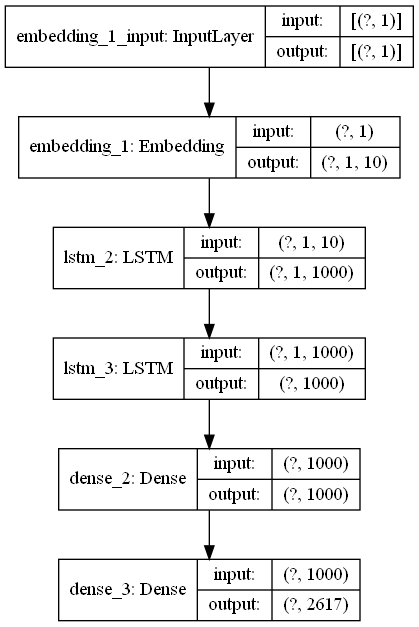

In [63]:
keras.utils.plot_model(model, to_file='NN_model.png', show_layer_names=True, show_shapes=True,    expand_nested=True
,    rankdir='TB'

)



In [69]:
import os

os.environ["Path"]= "C:\\Program Files\\Graphviz\\bin"


In [70]:
import os
os.getenv("Path")


'C:\\Program Files\\Graphviz\\bin'

In [ ]:
'C:\\ProgramData\\Anaconda3;C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\Library\\bin;C:\\ProgramData\\Anaconda3\\Scripts;C:\\ProgramData\\Anaconda3\\bin;C:\\ProgramData\\Anaconda3\\condabin;C:\\Python38\\Scripts;C:\\Python38;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0;C:\\WINDOWS\\System32\\OpenSSH;C:\\Program Files\\Git\\cmd;C:\\Program Files\\PuTTY;C:\\Program Files\\Amazon\\AWSCLIV2;C:\\Program Files\\nodejs;C:\\ProgramData\\chocolatey\\bin;C:\\Program Files\\dotnet;C:\\Program Files\\Graphviz\\bin;C:\\Users\\Admin\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Program Files (x86)\\Graphviz2.38\\bin;C:\\Users\\Admin\\AppData\\Roaming\\npm;C:\\Users\\Admin\\AppData\\Local\\Programs\\Microsoft VS Code\\bin;C:\\Users\\Admin\\.dotnet\\tools'

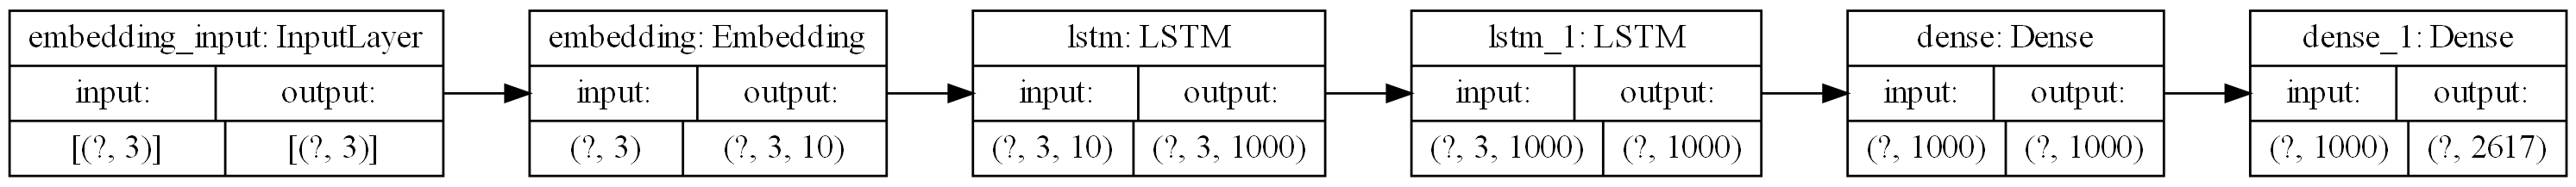

In [37]:


keras.utils.plot_model(model, to_file='NN_model.png', show_layer_names=True, show_shapes=True,    expand_nested=True
,    rankdir='LR', dpi=200

)



### Callbacks:

In [38]:
#OUTPUT FILES FOR FUTURE PREDICTIONS


from tensorflow.keras.callbacks import ModelCheckpoint,


checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')



# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))


In [39]:
#important callback in tf
#Reduce Learning Rate On Plateau i.e no improvement in loass function

from tensorflow.keras.callbacks import ReduceLROnPlateau


reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)


In [40]:
from tensorflow.keras.callbacks import TensorBoard


logdir='logsnextword'
tensorboard_vis = TensorBoard(log_dir=logdir)

### Compile keras Model with hyperparameters

In [72]:

#lr=learning rate
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))




### Fit keras tf Model:

In [73]:

model.fit(X, y, epochs=4, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_vis])



Epoch 1/4
61/61 [==============================] - ETA: 0s - loss: 7.8754
Epoch 00001: loss did not improve from 6.35784
61/61 [==============================] - 29s 480ms/step - loss: 7.8754
Epoch 2/4
61/61 [==============================] - ETA: 0s - loss: 7.8572
Epoch 00002: loss did not improve from 6.35784
61/61 [==============================] - 25s 418ms/step - loss: 7.8572
Epoch 3/4
61/61 [==============================] - ETA: 0s - loss: 7.8032
Epoch 00003: loss did not improve from 6.35784
61/61 [==============================] - 25s 416ms/step - loss: 7.8032
Epoch 4/4
61/61 [==============================] - ETA: 0s - loss: 7.5934
Epoch 00004: loss did not improve from 6.35784
61/61 [==============================] - 26s 434ms/step - loss: 7.5934


### TENSORBOARD + Graph:

In [74]:
import site

site.getsitepackages()

# os.environ['TENSORBOARD_BINARY'] = "C:\\Program Files\\tensorboard\\bin"

['C:\\ProgramData\\Anaconda3',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages']

In [43]:
#%load_ext tensorboard.notebook

%reload_ext tensorboard
#  %reload_ext tensorboard
#--debugger_port <port_number>

%tensorboard --logdir=./logsnextword #logs/fit



#ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 5848.
#ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 11248.


Reusing TensorBoard on port 6006 (pid 14524), started 0:01:24 ago. (Use '!kill 14524' to kill it.)

In [44]:
import site

site.getsitepackages()

['C:\\ProgramData\\Anaconda3',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages']

In [45]:
%tensorboard dev upload --logdir ./logsnextword
#\
 #   'logs/fit'

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2020-11-06 16:06:46.504228: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-11-06 16:06:46.510902: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logsnextword

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

